In [1]:
%matplotlib notebook
import flux

Missing flux value for: GLEAM J202818-254302 at frequency: 204 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 212 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 220 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 227 MHz.
Missing spectral index for: GLEAM J202818-254302


//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

In [3]:
arbitrary_source = flux.catalog.obj_catalog[999]
arb_ra = arbitrary_source.ra_angle
arb_dec = arbitrary_source.dec_angle
J = flux.stokes.J_matrix(np.radians(arb_ra), np.radians(arb_dec))
J.shape
J

array([[[ 0.+0.j,  0.-0.j],
        [ 0.+0.j, -0.+0.j]]])

In [4]:
arb_ra = flux.rot.get_lst(radians=True)
arb_dec = np.radians(flux.rot.hera_lat)
print(flux.rot.hera_lat)
J = flux.stokes.J_matrix(arb_ra, arb_dec, flux.rot.get_lst(True))

-30.72138888888889


In [5]:
J

array([[[ 0.6336726 -0.46089191j, -0.02764655+0.01760581j],
        [ 0.02669347-0.01943525j,  0.66499247-0.4828037j ]]])

In [6]:
Am = flux.stokes.A_matrix(np.radians(arb_ra), np.radians(arb_dec))
print(Am)
Am.shape

[[[ 0.+0.j  0.+0.j]
  [-0.+0.j  0.-0.j]]]
[[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
  [ 0.-0.j  0.+0.j  0.-0.j  0.+0.j]
  [ 0.+0.j  0.+0.j  0.-0.j  0.-0.j]
  [ 0.+0.j -0.+0.j -0.+0.j  0.+0.j]]]
[[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

 [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

 [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

 [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]]]


(4, 1, 4)

In [7]:
flux.stokes.A_matrix??

In [8]:
Am[0][0][0]

0j

In [9]:
# Display available antennae
print(flux.demo.active_ants)

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 27, 36, 37, 38, 39, 40, 41, 50, 51, 52, 53, 54, 55, 65, 66, 67, 68, 69, 70, 71, 82, 83, 84, 85, 86, 87, 88, 98, 120, 121, 122, 123, 124, 136, 137, 138, 139, 140, 141, 142, 143]


In [10]:
# we sample three sources almost at random, and 2/3 are zero

print(arbitrary_source)
print(flux.vis.visibility(2, 11, arbitrary_source))

print(flux.vis.visibility(36, 37, flux.catalog.obj_catalog[981]))
print(flux.vis.visibility(88, 121, flux.catalog.obj_catalog[134]))
# also, would we not expect the first term to dominate? And yet it is not even the largest
    # of numbers all with magnitudes less than one

Name: GLEAM J185915-381842
Right ascension: 284.8155
Declination: -37.688250000000004
151 MHz flux: 1.2316479999999999

[[[ 0.01831028+0.02540903j -0.00306405-0.01417452j]
  [ 0.00585111+0.016663j   -0.01149387-0.00515961j]]]
[[[ 0.00098089+0.00000000e+00j -0.00041626+1.81684801e-04j
   -0.00041626-1.81684801e-04j  0.00021031+0.00000000e+00j]
  [ 0.00053053-1.56433256e-04j -0.00034156-1.97574057e-04j
   -0.00025412-3.18803075e-05j  0.00010835+1.47110706e-04j]
  [ 0.00053053+1.56433256e-04j -0.00025412+3.18803075e-05j
   -0.00034156+1.97574057e-04j  0.00010835-1.47110706e-04j]
  [ 0.00031189+0.00000000e+00j -0.00015323-1.61332859e-04j
   -0.00015323+1.61332859e-04j  0.00015873+0.00000000e+00j]]]
[-2.76473727e-04-3.87547535e-04j  9.35384380e-05-3.31024651e-04j
 -1.04066948e-05-7.24366847e-05j  2.15519088e-04-3.40435397e-04j]
[[[ 0.53163648-0.39123077j  0.02421209-0.01623924j]
  [-0.03447441+0.02427797j  0.57453506-0.42816078j]]]
[[[ 0.43569886+0.00000000e+00j  0.01922532-8.39143014e-04j


In [11]:
"""
This section kills the kernel! Do NOT run it!!
I am leaving it here as a to-do of sorts. I think, that my inability
to run it in this environment may be a bad sign.
(It does work fine in the shell, so far as I can tell.)

t = 0
arg = 134

obj = flux.catalog.obj_catalog[arg]
ra = np.radians(obj.ra_angle)
dec = np.radians(obj.dec_angle)
while t < 2 * np.pi:
    print(t)
    t += np.pi / 72
    
    print(flux.stokes.J_matrix(ra, dec, t))
    print("\n")

"""

'\nThis section kills the kernel! Do NOT run it!!\nI am leaving it here as a to-do of sorts. I think, that my inability\nto run it in this environment may be a bad sign.\n(It does work fine in the shell, so far as I can tell.)\n\nt = 0\narg = 134\n\nobj = flux.catalog.obj_catalog[arg]\nra = np.radians(obj.ra_angle)\ndec = np.radians(obj.dec_angle)\nwhile t < 2 * np.pi:\n    print(t)\n    t += np.pi / 72\n    \n    print(flux.stokes.J_matrix(ra, dec, t))\n    print("\n")\n\n'

In [12]:
vist = flux.vis.source_over_time(
    88, 121, arbitrary_source, 0, 2/3 * np.pi, np.pi / 72
)
vist

[[[ 0.01831065+0.02540824j -0.00306455-0.01417451j]
  [ 0.00585161+0.01666279j -0.01149354-0.00515864j]]]
[[[ 0.00098086+0.00000000e+00j -0.00041626+1.81679706e-04j
   -0.00041626-1.81679706e-04j  0.00021031+0.00000000e+00j]
  [ 0.00053052-1.56427386e-04j -0.00034153-1.97572527e-04j
   -0.00025412-3.18797797e-05j  0.00010834+1.47106348e-04j]
  [ 0.00053052+1.56427386e-04j -0.00025412+3.18797797e-05j
   -0.00034153+1.97572527e-04j  0.00010834-1.47106348e-04j]
  [ 0.00031189+0.00000000e+00j -0.00015321-1.61328036e-04j
   -0.00015321+1.61328036e-04j  0.00015871+0.00000000e+00j]]]
[[[ 0.01831073+0.02540806j -0.00306466-0.0141745j ]
  [ 0.00585172+0.01666274j -0.01149347-0.00515842j]]]
[[[ 0.00098085+0.00000000e+00j -0.00041626+1.81678567e-04j
   -0.00041626-1.81678567e-04j  0.00021031+0.00000000e+00j]
  [ 0.00053052-1.56426075e-04j -0.00034152-1.97572185e-04j
   -0.00025412-3.18796618e-05j  0.00010834+1.47105374e-04j]
  [ 0.00053052+1.56426075e-04j -0.00025412+3.18796618e-05j
   -0.0003415

[[[ 0.01831134+0.02540676j -0.00306547-0.01417448j]
  [ 0.00585255+0.01666239j -0.01149292-0.00515682j]]]
[[[ 0.00098081+0.00000000e+00j -0.00041626+1.81670149e-04j
   -0.00041626-1.81670149e-04j  0.00021031+0.00000000e+00j]
  [ 0.00053051-1.56416379e-04j -0.00034147-1.97569655e-04j
   -0.00025412-3.18787896e-05j  0.00010833+1.47098174e-04j]
  [ 0.00053051+1.56416379e-04j -0.00025412+3.18787896e-05j
   -0.00034147+1.97569655e-04j  0.00010833-1.47098174e-04j]
  [ 0.00031189+0.00000000e+00j -0.00015319-1.61318992e-04j
   -0.00015319+1.61318992e-04j  0.00015868+0.00000000e+00j]]]
[[[ 0.01831137+0.0254067j  -0.0030655 -0.01417448j]
  [ 0.00585258+0.01666237j -0.0114929 -0.00515675j]]]
[[[ 0.00098081+0.00000000e+00j -0.00041626+1.81669804e-04j
   -0.00041626-1.81669804e-04j  0.00021031+0.00000000e+00j]
  [ 0.0005305 -1.56415982e-04j -0.00034147-1.97569552e-04j
   -0.00025412-3.18787539e-05j  0.00010833+1.47097880e-04j]
  [ 0.0005305 +1.56415982e-04j -0.00025412+3.18787539e-05j
   -0.0003414

array([[-4.58755389e-04-1.27172501e-04j, -1.35631455e-04-3.16113886e-04j,
        -5.36788953e-05-4.97313986e-05j, -4.67466752e-05-4.00175648e-04j],
       [-4.75810585e-04-1.52745773e-05j, -2.06424117e-04-2.75158720e-04j,
        -6.39023780e-05-3.56504879e-05j, -1.39893128e-04-3.77824672e-04j],
       [-4.33928976e-04+1.95792160e-04j, -3.06492505e-04-1.56158207e-04j,
        -7.30714659e-05-3.87065933e-06j, -2.91961831e-04-2.77630280e-04j],
       [-2.17396148e-04+4.23518296e-04j, -3.37022744e-04+6.88369544e-05j,
        -5.95634341e-05+4.25037783e-05j, -4.01345469e-04-3.52261555e-05j],
       [ 1.91474776e-04+4.35850974e-04j, -1.59193860e-04+3.04925950e-04j,
        -4.59385749e-06+7.30286537e-05j, -2.80514442e-04+2.89185931e-04j],
       [ 4.75337538e-04+2.61302311e-05j,  2.00087669e-04+2.79798592e-04j,
         6.30724093e-05+3.70959520e-05j,  1.31225263e-04+3.80914056e-04j],
       [ 1.46168549e-04-4.53059683e-04j,  3.21487538e-04-1.22342195e-04j,
         5.19160777e-05-5.156391

<IPython.core.display.Javascript object>


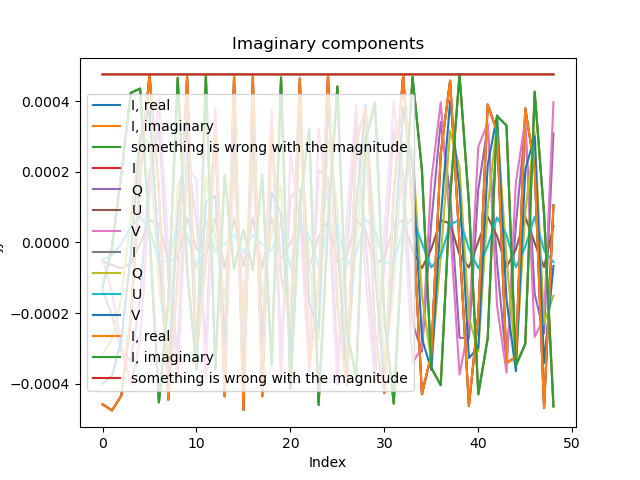

In [13]:
plt.plot(np.real(vist[:, 0]), label="I, real")
plt.plot(np.imag(vist[:, 0]), label="I, imaginary")
plt.plot(np.abs(vist[:, 0]), label="something is wrong with the magnitude")

plt.xlabel("Index")
plt.ylabel("Jy?")

plt.legend()

plt.show()

In [14]:
plt.plot(np.real(vist[:, 0]), label="I")
plt.plot(np.real(vist[:, 1]), label="Q")
plt.plot(np.real(vist[:, 2]), label="U")
plt.plot(np.real(vist[:, 3]), label="V")

plt.xlabel("Index")
plt.ylabel("Jy?")
plt.title("Real components")

plt.legend()

plt.show()

In [15]:
plt.plot(np.imag(vist[:, 0]), label="I")
plt.plot(np.imag(vist[:, 1]), label="Q")
plt.plot(np.imag(vist[:, 2]), label="U")
plt.plot(np.imag(vist[:, 3]), label="V")

plt.xlabel("Index")
plt.ylabel("Jy?")
plt.title("Imaginary components")

plt.legend()

plt.show()

In [16]:
vist = flux.vis.source_over_time(
    88, 121, arbitrary_source, 0, 2/3 * np.pi, np.pi / 72
)
plt.plot(np.real(vist[:, 0]), label="I, real")
plt.plot(np.imag(vist[:, 0]), label="I, imaginary")
plt.plot(np.abs(vist[:, 0]), label="something is wrong with the magnitude")

plt.xlabel("Index")
plt.ylabel("Jy?")

plt.legend()

plt.show()

[[[ 0.01831339+0.02540235j -0.00306822-0.01417442j]
  [ 0.00585534+0.0166612j  -0.01149109-0.0051514j ]]]
[[[ 0.00098066+0.00000000e+00j -0.00041625+1.81641738e-04j
   -0.00041625-1.81641738e-04j  0.00021033+0.00000000e+00j]
  [ 0.00053046-1.56383660e-04j -0.0003413 -1.97561107e-04j
   -0.00025413-3.18758449e-05j  0.00010828+1.47073878e-04j]
  [ 0.00053046+1.56383660e-04j -0.00025413+3.18758449e-05j
   -0.0003413 +1.97561107e-04j  0.00010828-1.47073878e-04j]
  [ 0.00031188+0.00000000e+00j -0.00015311-1.61292106e-04j
   -0.00015311+1.61292106e-04j  0.00015858+0.00000000e+00j]]]
[[[ 0.01831342+0.02540229j -0.00306826-0.01417442j]
  [ 0.00585538+0.01666118j -0.01149106-0.00515132j]]]
[[[ 0.00098066+0.00000000e+00j -0.00041625+1.81641319e-04j
   -0.00041625-1.81641319e-04j  0.00021033+0.00000000e+00j]
  [ 0.00053046-1.56383178e-04j -0.0003413 -1.97560981e-04j
   -0.00025413-3.18758014e-05j  0.00010827+1.47073520e-04j]
  [ 0.00053046+1.56383178e-04j -0.00025413+3.18758014e-05j
   -0.0003413

[[[ 0.01831402+0.025401j   -0.00306906-0.0141744j ]
  [ 0.0058562 +0.01666083j -0.01149052-0.00514973j]]]
[[[ 0.00098061+0.00000000e+00j -0.00041625+1.81633003e-04j
   -0.00041625-1.81633003e-04j  0.00021033+0.00000000e+00j]
  [ 0.00053045-1.56373603e-04j -0.00034125-1.97558475e-04j
   -0.00025413-3.18749391e-05j  0.00010826+1.47066408e-04j]
  [ 0.00053045+1.56373603e-04j -0.00025413+3.18749391e-05j
   -0.00034125+1.97558475e-04j  0.00010826-1.47066408e-04j]
  [ 0.00031188+0.00000000e+00j -0.00015309-1.61283841e-04j
   -0.00015309+1.61283841e-04j  0.00015855+0.00000000e+00j]]]
[[[ 0.01831405+0.02540093j -0.0030691 -0.0141744j ]
  [ 0.00585624+0.01666081j -0.0114905 -0.00514965j]]]
[[[ 0.00098061+0.00000000e+00j -0.00041625+1.81632573e-04j
   -0.00041625-1.81632573e-04j  0.00021033+0.00000000e+00j]
  [ 0.00053045-1.56373107e-04j -0.00034124-1.97558345e-04j
   -0.00025413-3.18748944e-05j  0.00010826+1.47066040e-04j]
  [ 0.00053045+1.56373107e-04j -0.00025413+3.18748944e-05j
   -0.0003412